In [ ]:
%load_ext autoreload
%autoreload 2

In [11]:
import matplotlib.pyplot as plt
import colorcet as cc
import networkx as nx
import pandas as pd
import plotly.graph_objects as go
import sys

sys.path.append("/Users/jlq293/Projects/Study-1-Bibliometrics/src/main_path/")

from MainPathReader import MainPathReader
from MainPathDataAssigner import MainPathDataAssigner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
p = "../data/06-clustered-df/alpha0.3_k20_res0.006.pkl"
df = pd.read_pickle(p)

p_summary = "../output/tables/cluster-explorer/FinalSelect/SingleSolExplorer_alpha0.3_k20_res0.006.xlsx"
# read sheet 1
df_summary = pd.read_excel(p_summary, sheet_name=0)

Cannot be read by networkx, so reading in from scratch

# read in main path data from pajek


In [7]:
path_to_main_path = (
    "../data/08-main-paths/18. Key-Route Global Main Path [150-200] of N5 (156).net"
)
mp_reader = MainPathReader(path_to_main_path)
Gmp = mp_reader.get_graph()

DiGraph with 156 nodes and 193 edges


# Add Info from df to mp


In [20]:
attr_to_assign = [
    "title",
    "cited_by",
    "doi",
    "year",
    "first_author",
    "cluster_alpha0.3_k20_res0.006",
    "centrality_alpha0.3_k20_res0.006",
]

data_assigner = MainPathDataAssigner(Gmp, df, attr_to_assign)
Gmp = data_assigner.process_mp()
print(list(graph.nodes(data=True))[0])

Data assigned to nodes.
Unwanted node attributes removed.
('1', {'label': '16', 'eid': '2-s2.0-0019996341', 'title': 'Treatment of myoclonic syndromes with paroxetine alone or combined with 5‐HTP', 'cited_by': 'nan', 'doi': '10.1111/j.1600-0404.1982.tb04525.x', 'year': '1982', 'first_author': 'Magnussen I.', 'cluster_alpha0.3_k20_res0.006': '57', 'centrality_alpha0.3_k20_res0.006': '0.053737004306467065'})


# plot the main path


In [26]:
from MainPathPlotterStatic import MainPathPlotterStatic
from MainPathPlotterInteractive import MainPathPlotterInteractive

# interactive


In [27]:
mpp_i = MainPathPlotterInteractive(Gmp, "cluster_alpha0.3_k20_res0.006")

mpp_i.plot_network_on_timeline_interactive()

<Figure size 640x480 with 0 Axes>

# static


Plotting network on a static vertical timeline...


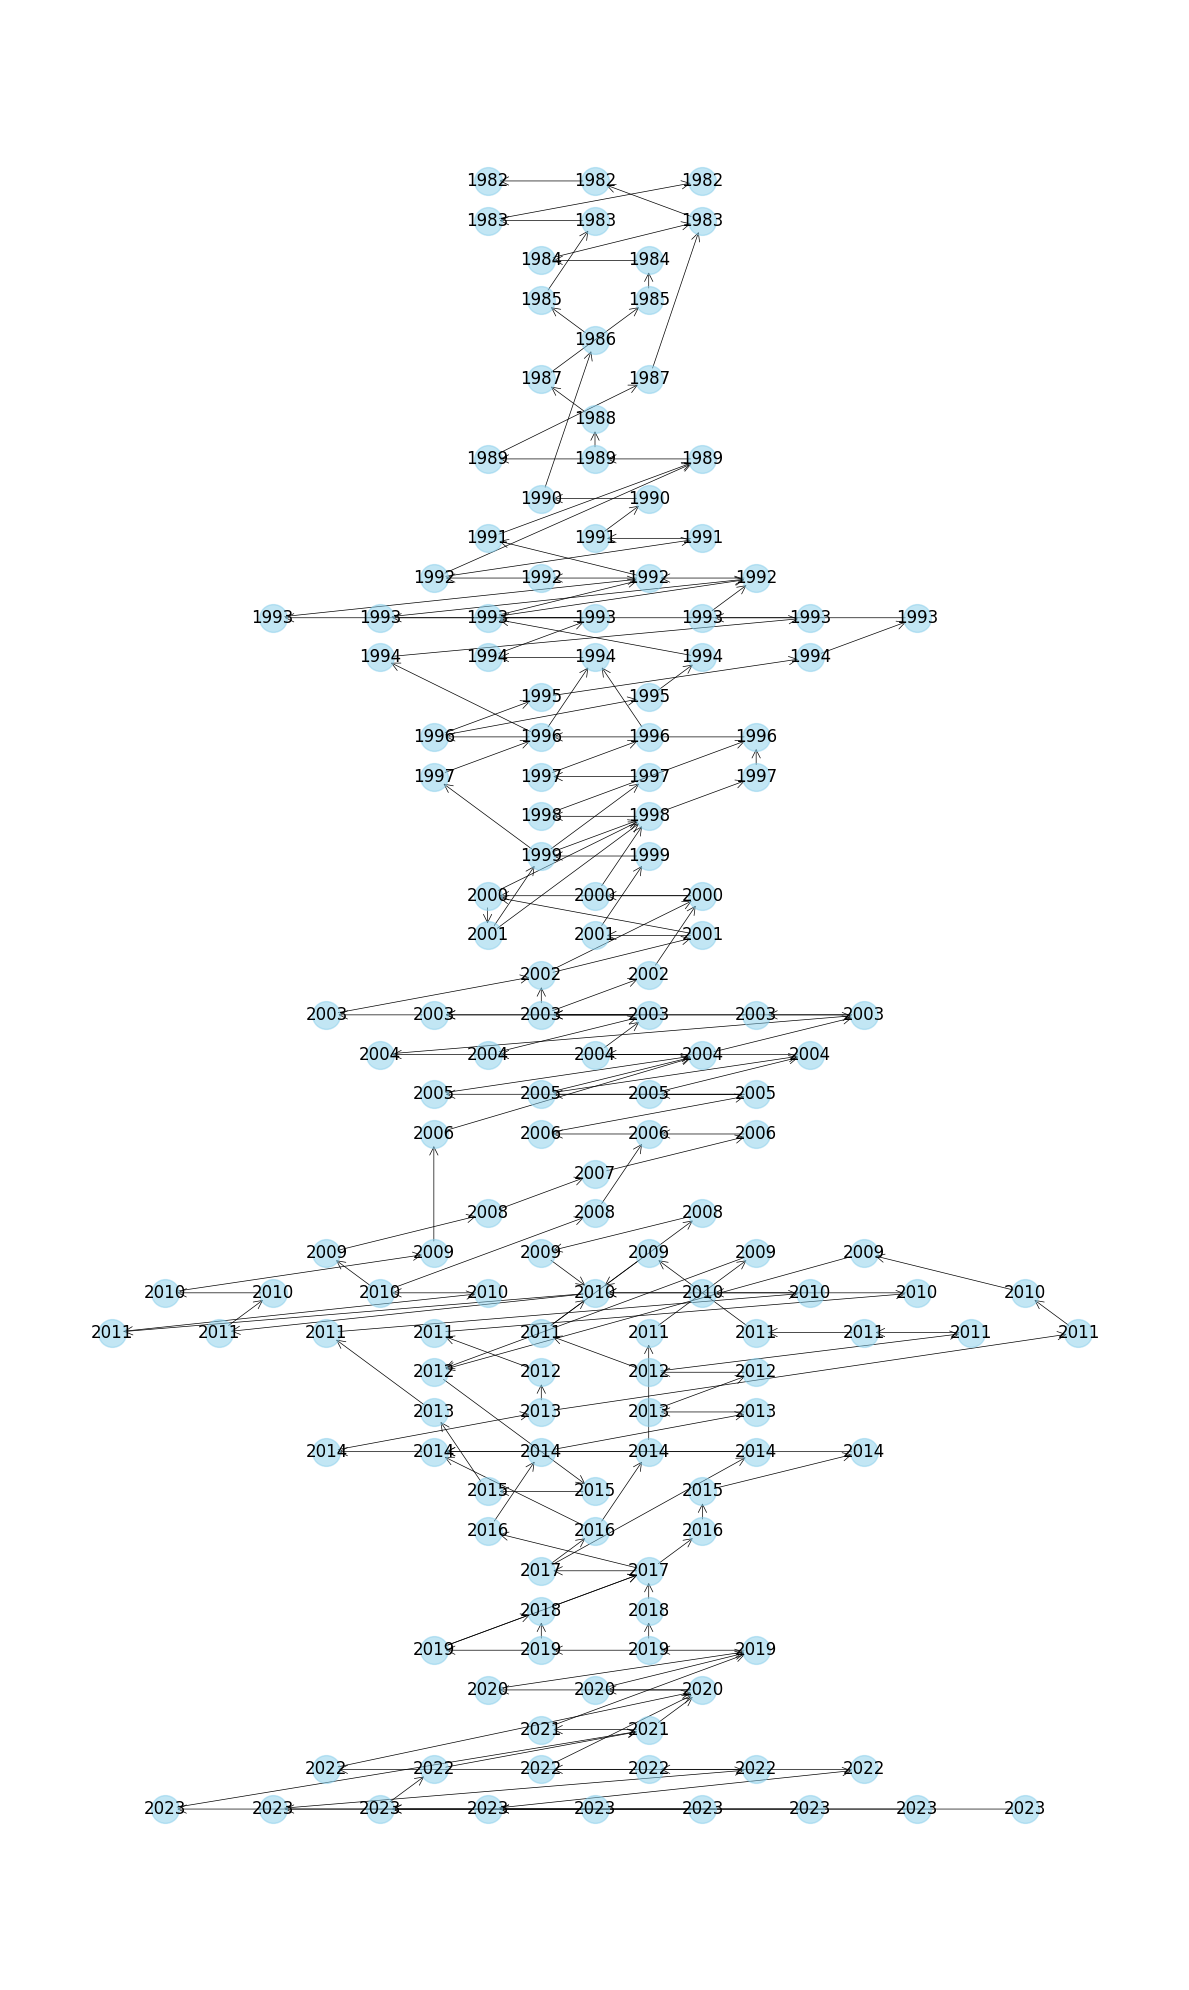

In [22]:
mpp_s = MainPathPlotterStatic(Gmp)
mpp_s.plot_network_on_timeline_vertical_static(
    savingpath=None, vertical_spacing=20, horizontal_spacing=2
)

In [ ]:
# plot all the main paths